<a href="https://colab.research.google.com/github/JumaOchi/PortfolioProjects/blob/main/SFR_PROJECT_With_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Importing the necessary libraries
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Load the data set
file_path = '/content/drive/My Drive/Launch SFR.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Price ($/kg),Funding ($M),Launch Class,Orbit Altitude,Tech Type,Country,HQ Location,Description
0,Arianespace/Avio,9,"20,000",170.00,"8,500",Public,"Medium, Heavy",LEO,Rocket,Italy,Colleferro,Developing the Vega & Ariane launch vehicles
1,Astra Space,9,300,3.95,"13,167",Public,Small,LEO,Rocket,United States,"Alameda, CA",Providing routine launch access to Earth orbit...
2,Black Sky Aerospace,9,350,0.60,"1,714",-,Small,Suborbital,Rocket,Australia,"Browns Plains, Queensland","Offers a range of sounding rockets, capable of..."
3,Blue Origin,9,0,0.00,0,-,"Tourism, Small, Heavy",Suborbital,Rocket,United States,"Kent, WA",Lowering the cost of access to space with reus...
4,CNIM Air Space,9,"2,700",0.00,0,Public,"Small, Medium",Suborbital,Balloon,France,Ayguesvives,Balloons that lift anything from a few kilogra...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           183 non-null    object 
 1   SFR               183 non-null    int64  
 2   Payload (kg)      183 non-null    object 
 3   Launch Cost ($M)  183 non-null    float64
 4   Price ($/kg)      183 non-null    object 
 5   Funding ($M)      183 non-null    object 
 6   Launch Class      183 non-null    object 
 7   Orbit Altitude    183 non-null    object 
 8   Tech Type         183 non-null    object 
 9   Country           183 non-null    object 
 10  HQ Location       183 non-null    object 
 11  Description       183 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 17.3+ KB


In [ ]:
data.shape

(183, 12)

In [ ]:
data.size

2196

In [ ]:
data.describe()

,SFR,Launch Cost ($M)
count,183.000000,183.000000
mean,3.726776,4.840956
std,2.527148,19.132872
min,0.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.500000
max,9.000000,170.000000


In [ ]:
#Check for missing values
data.isnull().sum()

,0
Company,0
SFR,0
Payload (kg),0
Launch Cost ($M),0
Price ($/kg),0
Funding ($M),0
Launch Class,0
Orbit Altitude,0
Tech Type,0
Country,0


In [ ]:
# Check for duplicates
duplicates = data.duplicated().sum()

#percentage of duplicates of the total data
percentage = data.duplicated().sum() / data.shape[0] * 100

print(f'{duplicates} rows contain duplicates amounting to {percentage.round(2)}% of the total data.')

0 rows contain duplicates amounting to 0.0% of the total data.


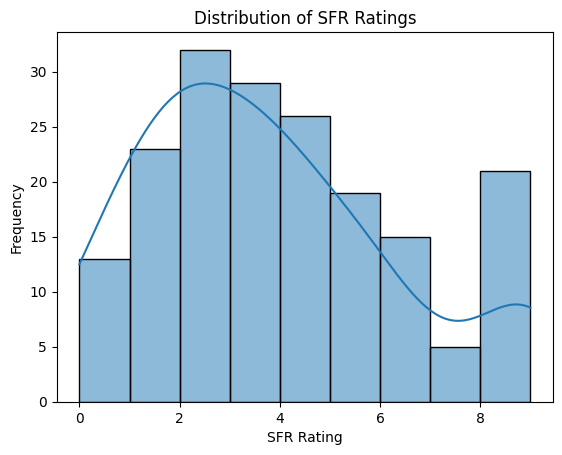

In [ ]:
# Distribution of SFR ratings
sns.histplot(data['SFR'], bins=9, kde=True)
plt.title('Distribution of SFR Ratings')
plt.xlabel('SFR Rating')
plt.ylabel('Frequency')
plt.show()

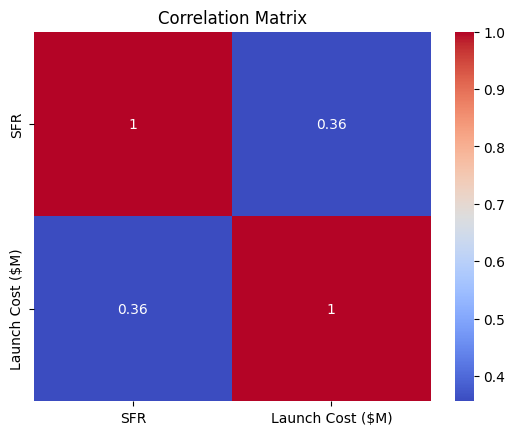

In [ ]:
# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           183 non-null    object 
 1   SFR               183 non-null    int64  
 2   Payload (kg)      183 non-null    object 
 3   Launch Cost ($M)  183 non-null    float64
 4   Price ($/kg)      183 non-null    object 
 5   Funding ($M)      183 non-null    object 
 6   Launch Class      183 non-null    object 
 7   Orbit Altitude    183 non-null    object 
 8   Tech Type         183 non-null    object 
 9   Country           183 non-null    object 
 10  HQ Location       183 non-null    object 
 11  Description       183 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 17.3+ KB


In [ ]:
# Convert columns to numeric, handle errors and missing values
data['Payload (kg)'] = pd.to_numeric(data['Payload (kg)'], errors='coerce') #Removed .str.replace(',', '')
data['Price ($/kg)'] = pd.to_numeric(data['Price ($/kg)'], errors='coerce') #Removed .str.replace(',', '')
data['Funding ($M)'] = pd.to_numeric(data['Funding ($M)'], errors='coerce') #Removed .str.replace(',', '')
# This seems to be categorical data['Orbit Altitude'] = pd.to_numeric(data['Orbit Altitude'], errors='coerce') #Removed .str.replace(',', '')

# Check for and handle any resulting NaN values
# Instead of dropping all rows with NaN, consider imputing missing values
# For example, you could replace NaNs with the mean or median of the column:
for col in ['Payload (kg)', 'Price ($/kg)', 'Funding ($M)']:
    data[col] = data[col].fillna(data[col].mean())

In [ ]:
data.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Price ($/kg),Funding ($M),Launch Class,Orbit Altitude,Tech Type,Country,HQ Location,Description
0,Arianespace/Avio,9,157.4,170.00,16.205357,226.989048,"Medium, Heavy",LEO,Rocket,Italy,Colleferro,Developing the Vega & Ariane launch vehicles
1,Astra Space,9,300.0,3.95,16.205357,226.989048,Small,LEO,Rocket,United States,"Alameda, CA",Providing routine launch access to Earth orbit...
2,Black Sky Aerospace,9,350.0,0.60,16.205357,226.989048,Small,Suborbital,Rocket,Australia,"Browns Plains, Queensland","Offers a range of sounding rockets, capable of..."
3,Blue Origin,9,0.0,0.00,0.000000,226.989048,"Tourism, Small, Heavy",Suborbital,Rocket,United States,"Kent, WA",Lowering the cost of access to space with reus...
4,CNIM Air Space,9,157.4,0.00,0.000000,226.989048,"Small, Medium",Suborbital,Balloon,France,Ayguesvives,Balloons that lift anything from a few kilogra...


In [ ]:
#DATA PREPROCESSING
# Drop the 'Description' column it's not necessary for the analysis
data_new = data.drop(columns=['Description', 'HQ Location'])

#Given the above it is important to impute or drop the Orbit Altitude column
#Since all of them seem to be Nan values we will drop the entire column
#data_new = data_new.drop(columns=['Orbit Altitude'])

# Encode categorical variables
categorical_features = ['Launch Class', 'Tech Type', 'Orbit Altitude', 'Country']
numerical_features = ['Payload (kg)', 'Launch Cost ($M)', 'Price ($/kg)', 'Funding ($M)']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # Added handle_unknown='ignore'
    ])


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           183 non-null    object 
 1   SFR               183 non-null    int64  
 2   Payload (kg)      183 non-null    float64
 3   Launch Cost ($M)  183 non-null    float64
 4   Price ($/kg)      183 non-null    float64
 5   Funding ($M)      183 non-null    float64
 6   Launch Class      183 non-null    object 
 7   Orbit Altitude    183 non-null    object 
 8   Tech Type         183 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 13.0+ KB


In [ ]:
data_new.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Price ($/kg),Funding ($M),Launch Class,Orbit Altitude,Tech Type
0,Arianespace/Avio,9,157.4,170.00,16.205357,226.989048,"Medium, Heavy",LEO,Rocket
1,Astra Space,9,300.0,3.95,16.205357,226.989048,Small,LEO,Rocket
2,Black Sky Aerospace,9,350.0,0.60,16.205357,226.989048,Small,Suborbital,Rocket
3,Blue Origin,9,0.0,0.00,0.000000,226.989048,"Tourism, Small, Heavy",Suborbital,Rocket
4,CNIM Air Space,9,157.4,0.00,0.000000,226.989048,"Small, Medium",Suborbital,Balloon


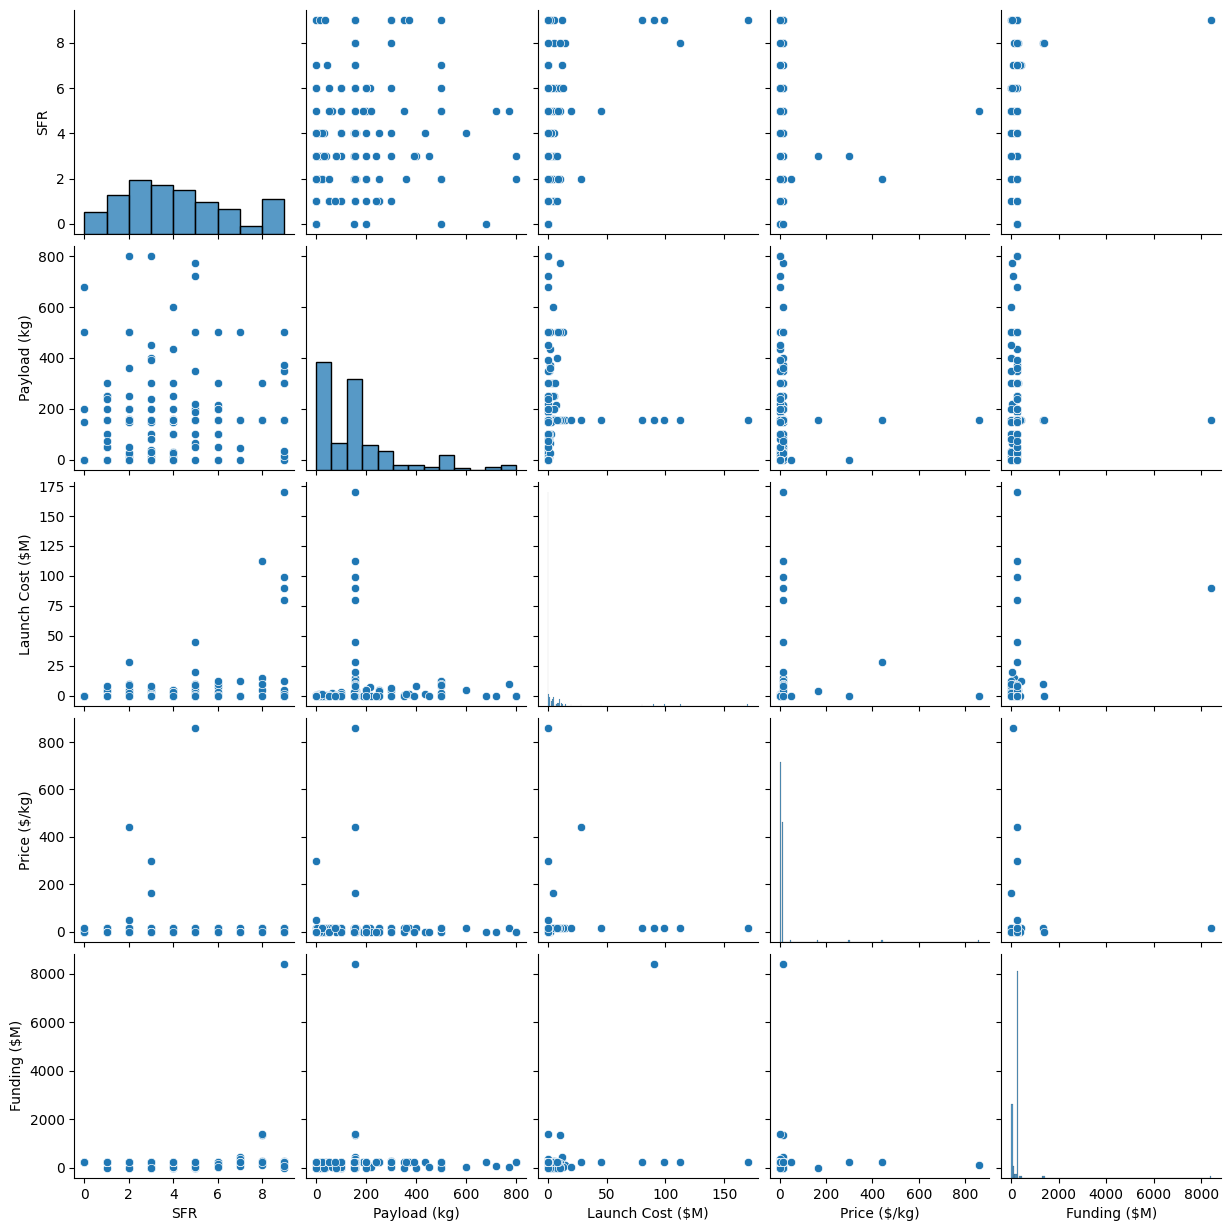

In [ ]:
sns.pairplot(data_new)
plt.show()

In [ ]:
# Check for NaN values
print("Checking for NaN values:")
print(data_new.isna().sum())

# Check for infinite values in numerical columns only
print("\nChecking for infinite values:")
for col in data_new.select_dtypes(include=np.number):
    print(f'{col}: {np.isinf(data_new[col]).sum()}')

Checking for NaN values:
Company             0
SFR                 0
Payload (kg)        0
Launch Cost ($M)    0
Price ($/kg)        0
Funding ($M)        0
Launch Class        0
Orbit Altitude      0
Tech Type           0
dtype: int64

Checking for infinite values:
SFR: 0
Payload (kg): 0
Launch Cost ($M): 0
Price ($/kg): 0
Funding ($M): 0


In [ ]:
"""# Split the dataset
X = data_new.drop('SFR', axis=1)
y = data_new['SFR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)"""


"# Split the dataset\nX = data_new.drop('SFR', axis=1)\ny = data_new['SFR']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Apply preprocessing\nX_train_preprocessed = preprocessor.fit_transform(X_train)\nX_test_preprocessed = preprocessor.transform(X_test)"

In [ ]:
"""#USING LINEAR REGRESSION
# Build and train the model
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = model.predict(X_test_preprocessed)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')"""


"#USING LINEAR REGRESSION\n# Build and train the model\nmodel = LinearRegression()\nmodel.fit(X_train_preprocessed, y_train)\n\n# Predictions\ny_pred = model.predict(X_test_preprocessed)\n\n# Model evaluation\nmse = mean_squared_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\n\nprint(f'Mean Squared Error: {mse}')\nprint(f'R^2 Score: {r2}')"

In [ ]:
"""# Get feature importances
feature_names = (preprocessor.transformers_[0][1].get_feature_names_out(numerical_features).tolist() +
                 preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist())

coefficients = model.coef_

# Create a DataFrame for coefficients
features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
features_df = features_df.sort_values(by='Coefficient', ascending=False)

#plot the histogram
plt.figure(figsize=(10, 12)) # Increased figure height

sns.barplot(x='Coefficient', y='Feature', data=features_df)
plt.title('Feature Impact Analysis')

plt.yticks(fontsize=8) # Adjust font size as needed

plt.show()

#It is important to handle the cramping up of features in the below plots a heatmap would work
#since it can handle a large number of features but still doesnt address the issue that some of the features
#could have very little to no explanatory power. I am going to explore 3 possible solutions to better visualize
#and address this issues Grouping the features into categories, reducing dimensionality or selecting top N features"""


"# Get feature importances\nfeature_names = (preprocessor.transformers_[0][1].get_feature_names_out(numerical_features).tolist() +\n                 preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist())\n\ncoefficients = model.coef_\n\n# Create a DataFrame for coefficients\nfeatures_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})\nfeatures_df = features_df.sort_values(by='Coefficient', ascending=False)\n\n#plot the histogram\nplt.figure(figsize=(10, 12)) # Increased figure height\n\nsns.barplot(x='Coefficient', y='Feature', data=features_df)\nplt.title('Feature Impact Analysis')\n\nplt.yticks(fontsize=8) # Adjust font size as needed\n\nplt.show()\n\n#It is important to handle the cramping up of features in the below plots a heatmap would work\n#since it can handle a large number of features but still doesnt address the issue that some of the features\n#could have very little to no explanatory power. I am going to explore 3 pos

In [ ]:
"""# Convert the features and coefficients into a matrix form for the heatmap
coefficients_matrix = pd.DataFrame([coefficients], columns=feature_names)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(coefficients_matrix, cmap='coolwarm', annot=True, cbar=True, yticklabels=['Coefficient'])
plt.title('Feature Impact Analysis (Heatmap)')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for better readability
plt.show()"""


"# Convert the features and coefficients into a matrix form for the heatmap\ncoefficients_matrix = pd.DataFrame([coefficients], columns=feature_names)\n\nplt.figure(figsize=(12, 6))  # Adjust figure size as needed\nsns.heatmap(coefficients_matrix, cmap='coolwarm', annot=True, cbar=True, yticklabels=['Coefficient'])\nplt.title('Feature Impact Analysis (Heatmap)')\nplt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for better readability\nplt.show()"

In [ ]:
#Given the nature of your dataset and the objective to predict a continuous SFR rating (which seems to be an ordinal variable)
# Logistic regression or linear might might not be best suited so we will attempt using RandomForestRegression or XGBoost Regression

#RANDOM FOREST REGRESSION

"""from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_preprocessed, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')"""


"from sklearn.ensemble import RandomForestRegressor\n\n# Initialize the model\nrf_model = RandomForestRegressor(n_estimators=100, random_state=42)\n\n# Train the model\nrf_model.fit(X_train_preprocessed, y_train)\n\n# Predictions\ny_pred_rf = rf_model.predict(X_test_preprocessed)\n\n# Model evaluation\nmse_rf = mean_squared_error(y_test, y_pred_rf)\nr2_rf = r2_score(y_test, y_pred_rf)\n\nprint(f'Random Forest Mean Squared Error: {mse_rf}')\nprint(f'Random Forest R^2 Score: {r2_rf}')"

In [ ]:
"""#XGBOOST REGRESSION

import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train_preprocessed, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_preprocessed)

# Model evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R^2 Score: {r2_xgb}')"""


"#XGBOOST REGRESSION\n\nimport xgboost as xgb\n\n# Initialize the model\nxgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)\n\n# Train the model\nxgb_model.fit(X_train_preprocessed, y_train)\n\n# Predictions\ny_pred_xgb = xgb_model.predict(X_test_preprocessed)\n\n# Model evaluation\nmse_xgb = mean_squared_error(y_test, y_pred_xgb)\nr2_xgb = r2_score(y_test, y_pred_xgb)\n\nprint(f'XGBoost Mean Squared Error: {mse_xgb}')\nprint(f'XGBoost R^2 Score: {r2_xgb}')"

In [ ]:
"""# Compare performance
print(f'Linear Regression R^2 Score: {r2}')
print(f'Random Forest R^2 Score: {r2_rf}')
print(f'XGBoost R^2 Score: {r2_xgb}')

# Feature importance from Random Forest
importances_rf = rf_model.feature_importances_
features_df_rf = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances_rf})
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_rf)
plt.title('Random Forest Feature Importance')
plt.show()

# Feature importance from XGBoost
importances_xgb = xgb_model.feature_importances_
features_df_xgb = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances_xgb})
features_df_xgb = features_df_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_xgb)
plt.title('XGBoost Feature Importance')
plt.show()"""


"# Compare performance\nprint(f'Linear Regression R^2 Score: {r2}')\nprint(f'Random Forest R^2 Score: {r2_rf}')\nprint(f'XGBoost R^2 Score: {r2_xgb}')\n\n# Feature importance from Random Forest\nimportances_rf = rf_model.feature_importances_\nfeatures_df_rf = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances_rf})\nfeatures_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)\n\nplt.figure(figsize=(10, 8))\nsns.barplot(x='Importance', y='Feature', data=features_df_rf)\nplt.title('Random Forest Feature Importance')\nplt.show()\n\n# Feature importance from XGBoost\nimportances_xgb = xgb_model.feature_importances_\nfeatures_df_xgb = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances_xgb})\nfeatures_df_xgb = features_df_xgb.sort_values(by='Importance', ascending=False)\n\nplt.figure(figsize=(10, 8))\nsns.barplot(x='Importance', y='Feature', data=features_df_xgb)\nplt.title('XGBoost Feature Importanc

In [ ]:
#It is important to handle the cramping up of features in the below plots a heatmap would work
#since it can handle a large number of features but still doesnt address the issue that some of the features
#could have very little to no explanatory power. I am going to explore 3 possible solutions to better visualize
#and address this issues Grouping the features into categories, reducing dimensionality or selecting top N features
#We considered droping more variables with little explanatory power to the sfr in order to make our model even more cleaner

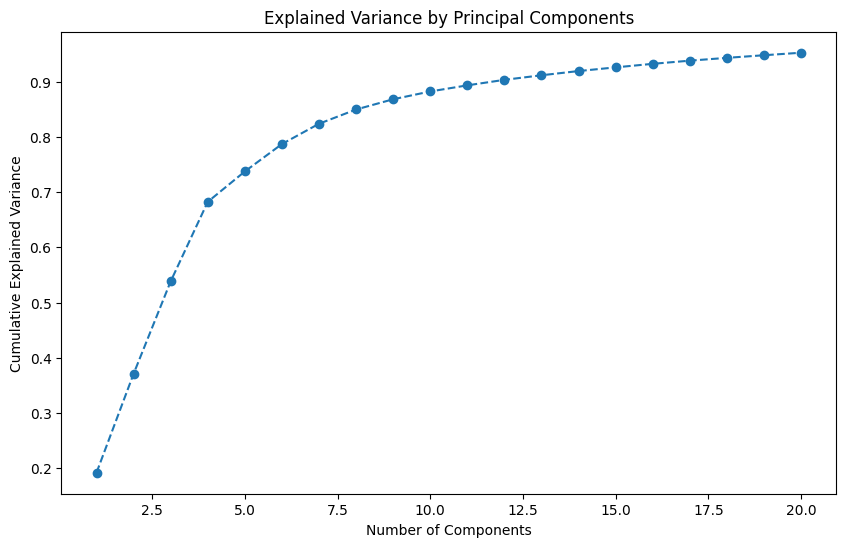

In [ ]:
# Here we will attempt to use PCA to address data dimensionality and try identify the most important features
#Which are driving variance in our data

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Drop unnecessary columns
data_new = data.drop(columns=['Description', 'HQ Location'])

# Define categorical and numerical features
categorical_features = ['Launch Class', 'Tech Type', 'Country', 'Orbit Altitude']
numerical_features = ['Payload (kg)', 'Launch Cost ($M)', 'Price ($/kg)', 'Funding ($M)']

# Split the dataset into features and target
X = data_new.drop('SFR', axis=1)
y = data_new['SFR']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# PCA component to reduce dimensions
pca = PCA(n_components=0.95)  # Retain components that explain 95% of the variance

# Complete pipeline with PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Fit the pipeline to the training data
pipeline.fit(X_train)

# Transform the training and test data
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Extract explained variance ratio for the principal components
explained_variance = pca.explained_variance_ratio_

# Display cumulative explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()



In [ ]:
data_new.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Price ($/kg),Funding ($M),Launch Class,Orbit Altitude,Tech Type,Country
0,Arianespace/Avio,9,157.4,170.00,16.205357,226.989048,"Medium, Heavy",LEO,Rocket,Italy
1,Astra Space,9,300.0,3.95,16.205357,226.989048,Small,LEO,Rocket,United States
2,Black Sky Aerospace,9,350.0,0.60,16.205357,226.989048,Small,Suborbital,Rocket,Australia
3,Blue Origin,9,0.0,0.00,0.000000,226.989048,"Tourism, Small, Heavy",Suborbital,Rocket,United States
4,CNIM Air Space,9,157.4,0.00,0.000000,226.989048,"Small, Medium",Suborbital,Balloon,France


In [ ]:
# We will now attempt to split the data into the few PC's and carry out analysis

# Assume `features_scaled` is the scaled feature matrix after preprocessing
# Define features_scaled - Assuming this should be the output from the preprocessor
features_scaled = preprocessor.fit_transform(X) # Fit and transform the data using the preprocessor defined earlier

# Apply PCA
pca = PCA(n_components=0.95)  # Retain enough components to explain 95% of the variance
principal_components = pca.fit_transform(features_scaled)

# Split the PCA-transformed data
X_pca = pd.DataFrame(principal_components)  # Convert to DataFrame for easy handling
y = data_new['SFR']  # Target variable

# Split the dataset into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_pca, y_train)

# Predict on test set
y_pred_lin = lin_reg.predict(X_test_pca)

# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'Linear Regression PCA MSE: {mse_lin}')
print(f'Linear Regression PCA R^2: {r2_lin}')

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_pca, y_train)

# Predict on test set
y_pred_rf = rf_reg.predict(X_test_pca)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression PCA MSE: {mse_rf}')
print(f'Random Forest Regression PCA R^2: {r2_rf}')

# XGBoost Regression
import xgboost as xgb

# Initialize and train the model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, random_state=42)
xg_reg.fit(X_train_pca, y_train)

# Predict on test set
y_pred_xgb = xg_reg.predict(X_test_pca)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Regression PCA MSE: {mse_xgb}')
print(f'XGBoost Regression PCA R^2: {r2_xgb}')



Linear Regression PCA MSE: 4.16926420127151
Linear Regression PCA R^2: 0.3256471300164583
Random Forest Regression PCA MSE: 3.5607771755224618
Random Forest Regression PCA R^2: 0.42406616808952624
XGBoost Regression PCA MSE: 3.831949078581924
XGBoost Regression PCA R^2: 0.3802057787596108


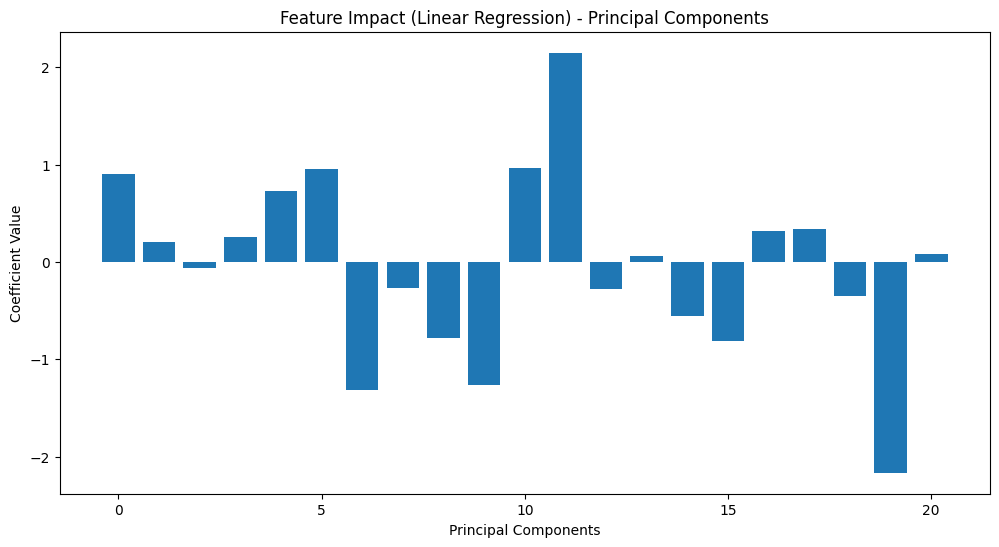

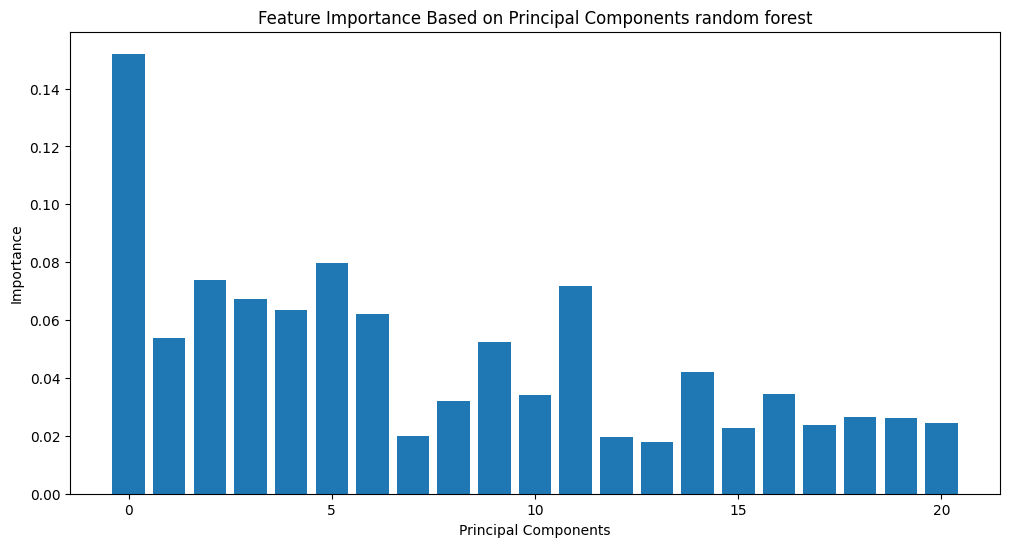

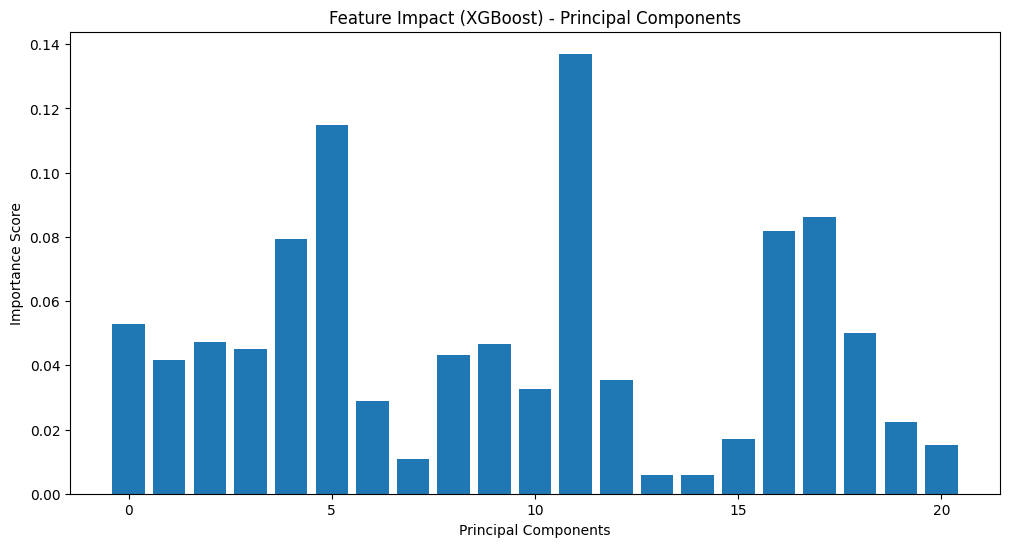

In [ ]:
# Coefficients from the linear regression model
coefficients = lin_reg.coef_

# Plot the coefficients to see the impact of each principal component
plt.figure(figsize=(12, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Principal Components')
plt.ylabel('Coefficient Value')
plt.title('Feature Impact (Linear Regression) - Principal Components')
plt.show()


# Feature impact from Random Forest
importances = rf_reg.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances)
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.title('Feature Importance Based on Principal Components random forest')
plt.show()

# Get feature importance from the XGBoost model
xgb_importances = xg_reg.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(xgb_importances)), xgb_importances)
plt.xlabel('Principal Components')
plt.ylabel('Importance Score')
plt.title('Feature Impact (XGBoost) - Principal Components')
plt.show()





In [ ]:
# Assuming 'pca' is the PCA model we fitted earlier
loadings = pca.components_

# Get the feature names from the preprocessor
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Convert the loadings into a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, columns=feature_names)

# Display the loadings
print(loadings_df)


    Payload (kg)  Launch Cost ($M)  Price ($/kg)  Funding ($M)  \
0       0.076274          0.708487      0.110101      0.672591   
1       0.927925          0.054342     -0.151828     -0.138965   
2       0.133106          0.005113      0.957378     -0.195927   
3      -0.167523          0.673639     -0.121743     -0.687634   
4       0.264736          0.054317     -0.061692     -0.036023   
5      -0.027317         -0.031129      0.089342      0.080243   
6       0.007077         -0.051989     -0.099506      0.025669   
7      -0.063481          0.128270      0.036340      0.033443   
8       0.044732          0.021343      0.048860      0.001072   
9       0.016701          0.014339     -0.045188      0.001489   
10     -0.067731         -0.014476     -0.058446     -0.015845   
11      0.023383          0.023463      0.006800      0.009410   
12     -0.010484          0.016899      0.011448     -0.002477   
13     -0.002039         -0.003623      0.013525      0.000276   
14     -0.

In [ ]:
# Determine dominant features for the first few principal components
num_top_features = 3  # Adjust this number based on how many top features you want to consider
for i in range(loadings_df.shape[0]):
    print(f"Top {num_top_features} features contributing to PC{i+1}:")
    top_features = loadings_df.iloc[i].abs().nlargest(num_top_features).index
    print(loadings_df.iloc[i][top_features])
    print()


Top 3 features contributing to PC1:
Launch Cost ($M)    0.708487
Funding ($M)        0.672591
Price ($/kg)        0.110101
Name: 0, dtype: float64

Top 3 features contributing to PC2:
Payload (kg)          0.927925
Launch Class_Small    0.163952
Price ($/kg)         -0.151828
Name: 1, dtype: float64

Top 3 features contributing to PC3:
Price ($/kg)    0.957378
Funding ($M)   -0.195927
Payload (kg)    0.133106
Name: 2, dtype: float64

Top 3 features contributing to PC4:
Funding ($M)       -0.687634
Launch Cost ($M)    0.673639
Payload (kg)       -0.167523
Name: 3, dtype: float64

Top 3 features contributing to PC5:
Tech Type_Rocket            -0.467597
Orbit Altitude_LEO          -0.460387
Orbit Altitude_Suborbital    0.421063
Name: 4, dtype: float64

Top 3 features contributing to PC6:
Country_United States   -0.645203
Tech Type_Rocket         0.415263
Orbit Altitude_LEO      -0.359743
Name: 5, dtype: float64

Top 3 features contributing to PC7:
Country_United States       -0.633717
La

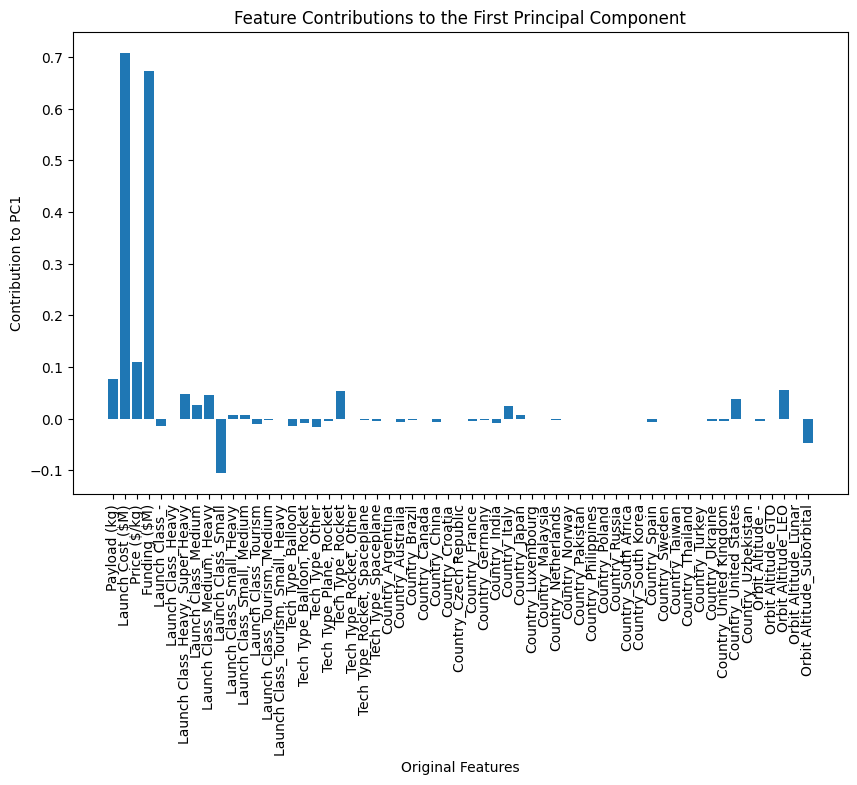

In [ ]:
# Example: Plot feature contributions to the first principal component
plt.figure(figsize=(10, 6))
plt.bar(loadings_df.columns, loadings_df.iloc[0])
plt.xlabel('Original Features')
plt.ylabel('Contribution to PC1')
plt.title('Feature Contributions to the First Principal Component')
plt.xticks(rotation=90)
plt.show()


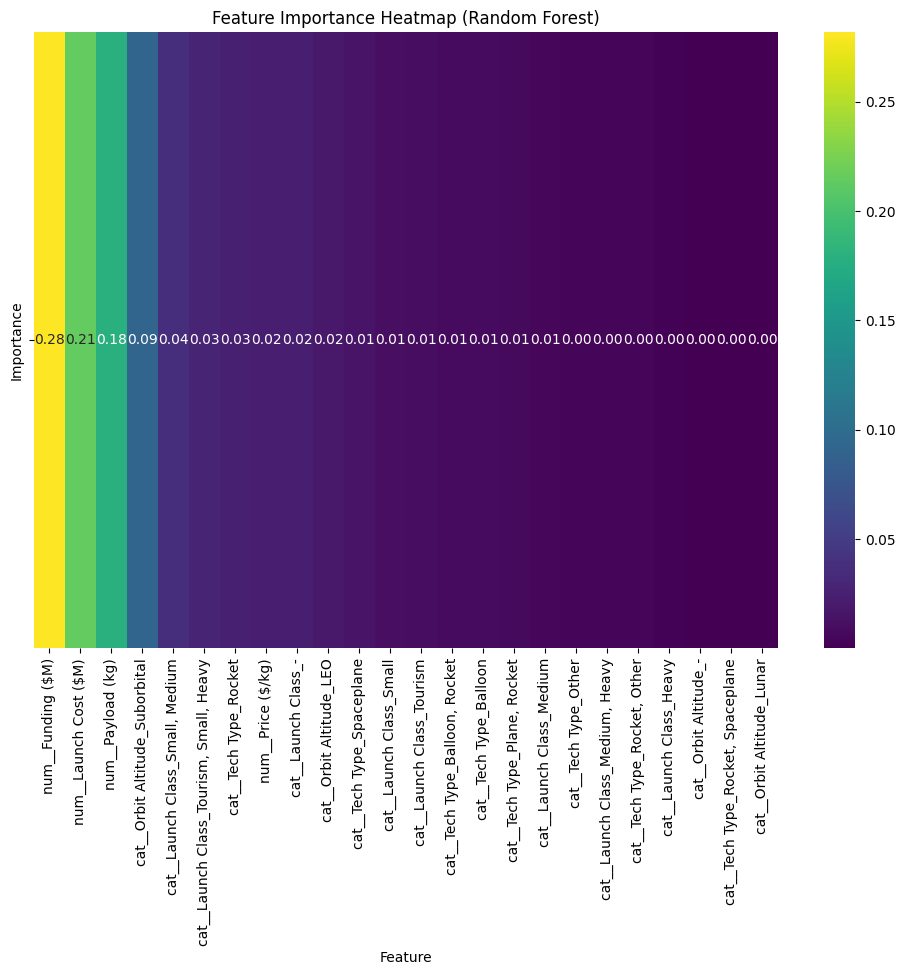

In [ ]:
# Sort features by importance
features_df_rf_sorted = features_df_rf.sort_values(by='Importance', ascending=False)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(features_df_rf_sorted.set_index('Feature').T, cmap='viridis', annot=True, fmt='.2f')
plt.title('Feature Importance Heatmap (Random Forest)')
plt.show()


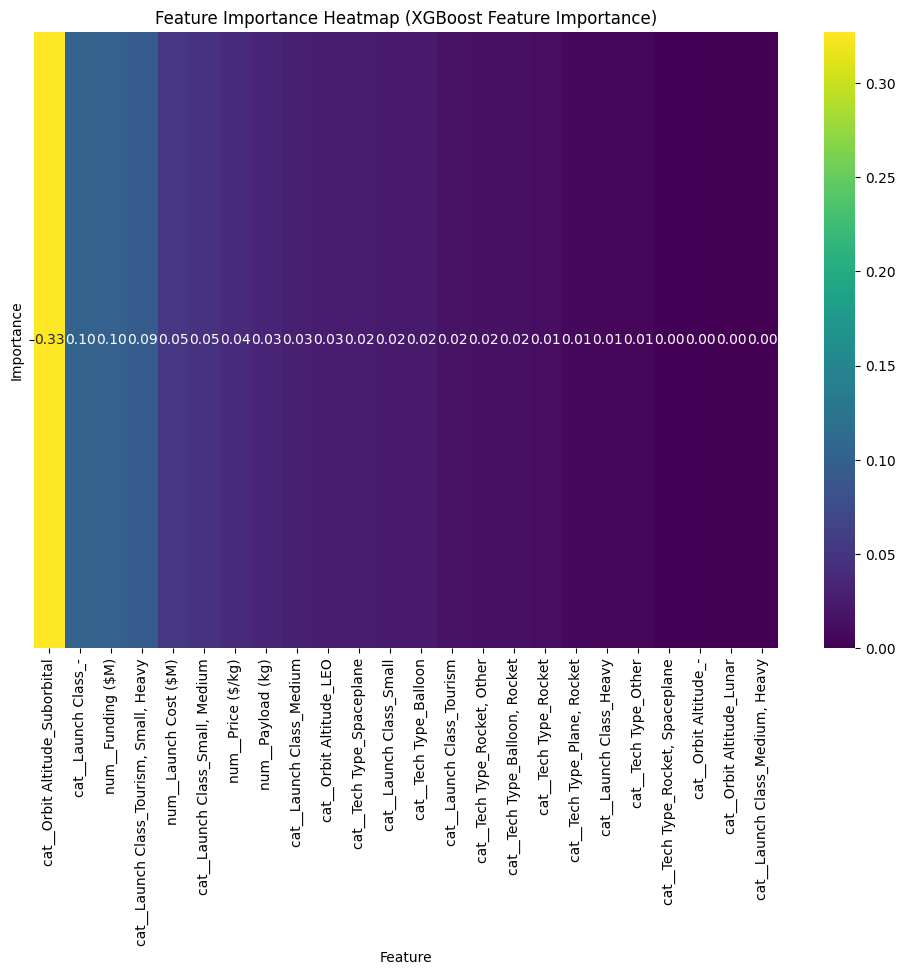

In [ ]:
# Sort features by importance
features_df_xgb_sorted = features_df_xgb.sort_values(by='Importance', ascending=False)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(features_df_xgb_sorted.set_index('Feature').T, cmap='viridis', annot=True, fmt='.2f')
plt.title('Feature Importance Heatmap (XGBoost Feature Importance)')
plt.show()


In [ ]:
#PCA yielded some improvement in the model performance while retaining most of the variables. Keeping it as it is showed a higher r^2 value
#We can explore other methods to refine it further but looks good as it is
#I will attempt selecting top N features

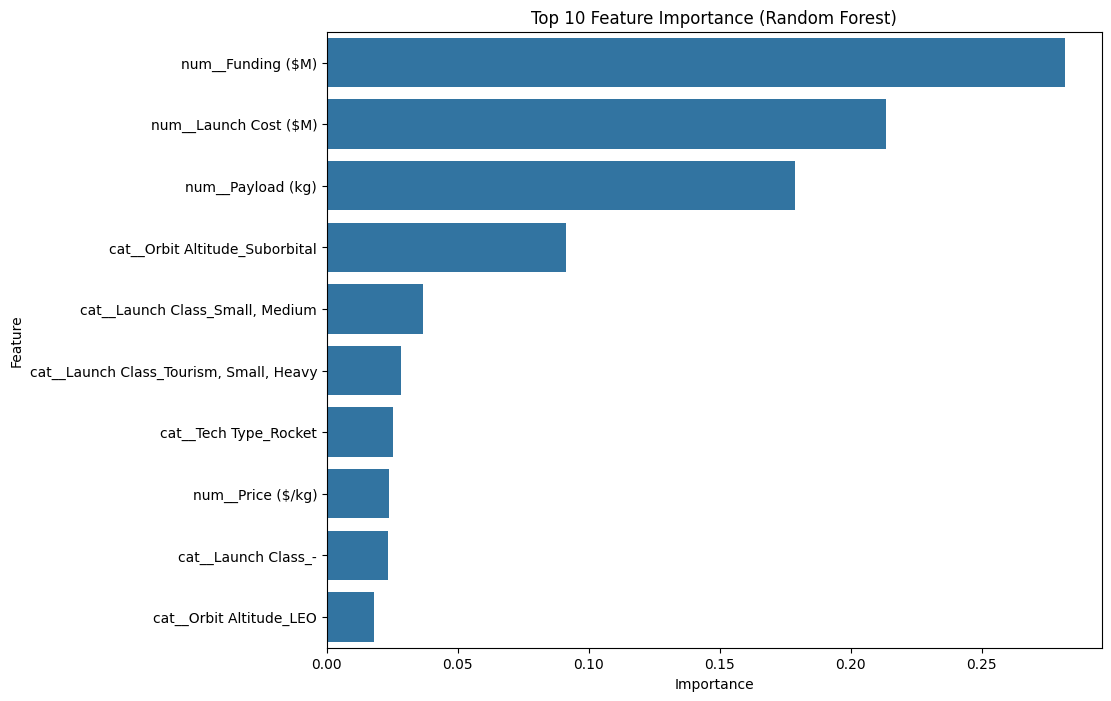

In [ ]:
# Select top 10 features
top_n = 10
features_df_rf_top = features_df_rf.head(top_n)

# Plot top 10 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_rf_top)
plt.title(f'Top {top_n} Feature Importance (Random Forest)')
plt.show()


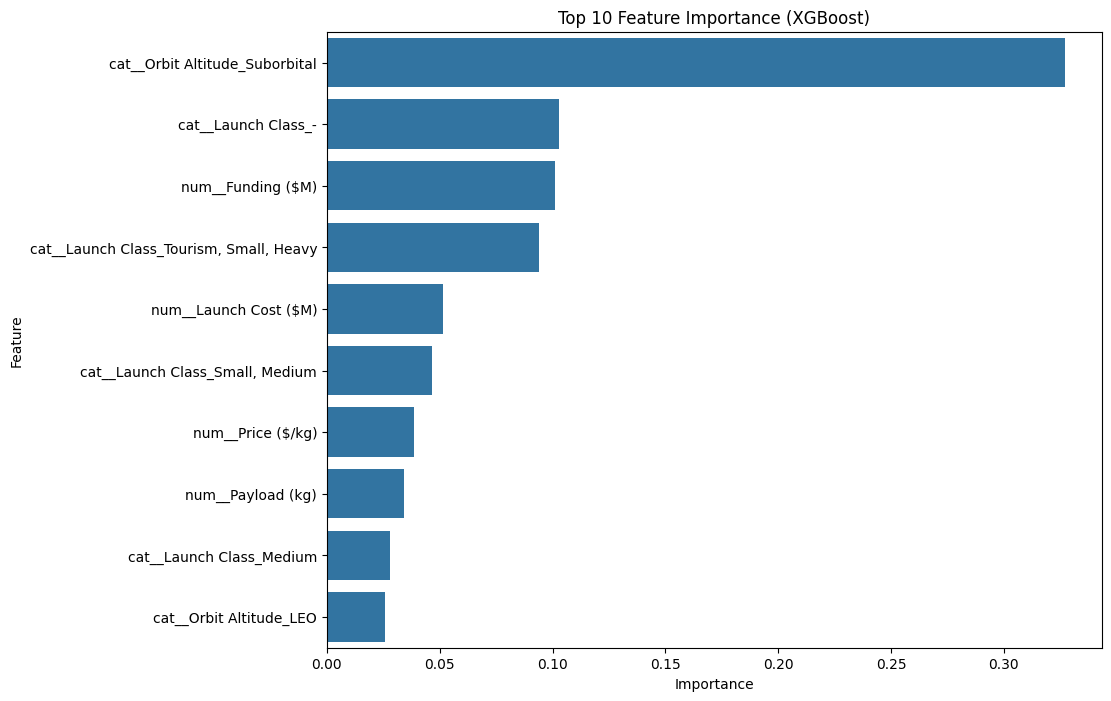

In [ ]:
# Select top 10 features
top_n = 10
features_df_xgb_top = features_df_xgb.head(top_n)

# Plot top 10 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_xgb_top)
plt.title(f'Top {top_n} Feature Importance (XGBoost)')
plt.show()

In [ ]:
# Compare actual vs. predicted SFR ratings RANDOM FOREST
comparison_df = pd.DataFrame({'Actual SFR': y_test, 'Predicted SFR': y_pred_rf})
print(comparison_df.head())

     Actual SFR  Predicted SFR
19            8       5.405000
42            5       3.965000
155           1       2.711333
111           3       3.726667
147           1       2.254333


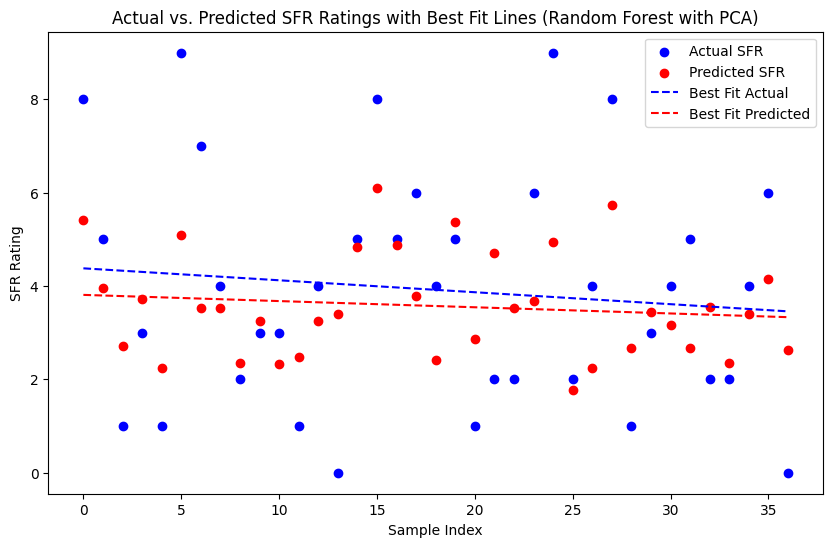

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual SFR')

# Plot predicted values
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='red', label='Predicted SFR')

# Fit a line of best fit for actual vs. predicted
m, b = np.polyfit(range(len(y_test)), y_test, 1)
plt.plot(range(len(y_test)), m*np.arange(len(y_test)) + b, color='blue', linestyle='--', label='Best Fit Actual')

m_pred, b_pred = np.polyfit(range(len(y_pred_rf)), y_pred_rf, 1)
plt.plot(range(len(y_pred_rf)), m_pred*np.arange(len(y_pred_rf)) + b_pred, color='red', linestyle='--', label='Best Fit Predicted')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('SFR Rating')
plt.title('Actual vs. Predicted SFR Ratings with Best Fit Lines (Random Forest with PCA)')
plt.legend()

# Show plot
plt.show()



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''